<a href="https://colab.research.google.com/github/nicoussj/MachineLearning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings

# Configuraciones para gráficos
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Ignorar advertencias
warnings.filterwarnings('ignore')

##DataSet

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";", encoding='latin1', header=0)

df.columns = df.columns.str.replace(';', '')

df.head(10)

df = df.dropna()
df['RoundStartingEquipmentValue'] = df['RoundStartingEquipmentValue'].fillna(df['RoundStartingEquipmentValue'].median())
df = pd.get_dummies(df, columns=['Map'], drop_first=True)
#Cambio de datos: Cambiar de False4 en RoundWinner a False, agregar False a MatchWinner, ya que en contexto aplica
df.loc[29,'MatchWinner'] = 'False'
df.loc[29,'RoundWinner'] = 'False'
#Se eliminará columna Unnamed: 0, ya que solo contiene las ID de las filas
#Se eliminará AbnormalMatch, ya que contiene solamente valores False
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['AbnormalMatch'], inplace=True)

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


##RandomForest

In [ ]:
# --- Modelo de Bosque Aleatorio (Random Forest Regressor) ---
# Objetivo: Predecir la cantidad de eliminaciones (MatchKills) utilizando un modelo de Bosque Aleatorio.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Define las características (variables independientes) y el objetivo (variable dependiente)
# Reemplaza 'columna1', 'columna2', etc. con los nombres reales de tus columnas
features_rf = ['TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'Map_de_inferno', 'Map_de_mirage', 'Map_de_nuke', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']
target_rf = 'MatchKills'

In [ ]:
# Asegura de que los datos son numéricos y sin valores nulos
df_model_rf = df[features_rf + [target_rf]].copy()
# Convert TimeAlive and TravelledDistance to numeric, coercing errors
df_model_rf['TimeAlive'] = pd.to_numeric(df_model_rf['TimeAlive'], errors='coerce')
df_model_rf['TravelledDistance'] = pd.to_numeric(df_model_rf['TravelledDistance'], errors='coerce')
df_model_rf['PrimaryAssaultRifle'] = pd.to_numeric(df_model_rf['PrimaryAssaultRifle'], errors='coerce')
df_model_rf = df_model_rf.dropna()

In [ ]:
# Separación de variables independientes (X) y dependiente (y)
X_rf = df_model_rf[features_rf]
y_rf = df_model_rf[target_rf]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

In [ ]:
# Crear un modelo de Random Forest Regressor
# Puedes ajustar parámetros como n_estimators, max_depth, etc.
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 para usar todos los núcleos

In [ ]:
# Entrenar el modelo
model_rf.fit(X_train_rf, y_train_rf)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# Realizar predicciones
y_pred_rf = model_rf.predict(X_test_rf)

In [ ]:
# Evaluar el modelo
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

In [ ]:
# Resultados en español
print("\n--- Resultados del Modelo Random Forest Regressor ---")
print(f"Error Absoluto Medio (MAE): {mae_rf:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse_rf:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_rf:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_rf:.2f}")


--- Resultados del Modelo Random Forest Regressor ---
Error Absoluto Medio (MAE): 2.43
Error Cuadrático Medio (MSE): 22.77
Raíz del Error Cuadrático Medio (RMSE): 4.77
Coeficiente de Determinación (R²): 0.33


In [ ]:
# Importancia de las características
print("\nImportancia de las características:")
feature_importances = pd.Series(model_rf.feature_importances_, index=features_rf)
print(feature_importances.sort_values(ascending=False))


Importancia de las características:
RoundStartingEquipmentValue    0.600785
Map_de_mirage                  0.240461
TeamStartingEquipmentValue     0.131127
Map_de_nuke                    0.024474
Map_de_inferno                 0.002401
TimeAlive                      0.000753
RoundAssists                   0.000000
TravelledDistance              0.000000
RLethalGrenadesThrown          0.000000
RoundHeadshots                 0.000000
RoundFlankKills                0.000000
RoundKills                     0.000000
PrimaryAssaultRifle            0.000000
PrimarySniperRifle             0.000000
PrimaryHeavy                   0.000000
PrimarySMG                     0.000000
PrimaryPistol                  0.000000
dtype: float64


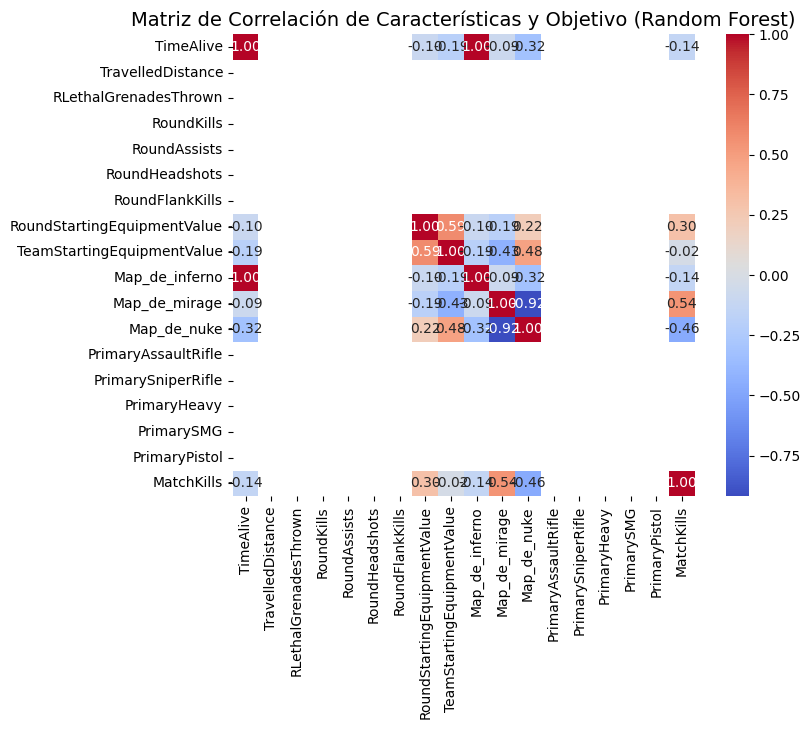

In [ ]:
# Visualización de una matriz de correlación (heatmap) entre las características seleccionadas y el objetivo
# Esto ayuda a entender las relaciones antes de modelar
plt.figure(figsize=(8, 6))
correlation_matrix_rf = df_model_rf.corr()
sns.heatmap(correlation_matrix_rf, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación de Características y Objetivo (Random Forest)', fontsize=14)
plt.show()

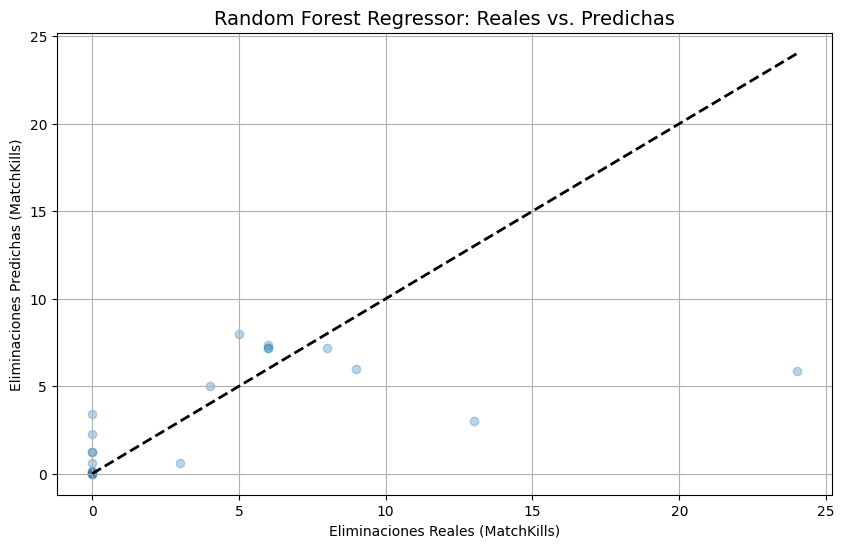

In [ ]:
# Gráfico de dispersión de valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rf, y_pred_rf, alpha=0.3)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'k--', lw=2)
plt.xlabel("Eliminaciones Reales (MatchKills)")
plt.ylabel("Eliminaciones Predichas (MatchKills)")
plt.title("Random Forest Regressor: Reales vs. Predichas", fontsize=14)
plt.grid(True)
plt.show()